# Part 1:

Reading noisy image:


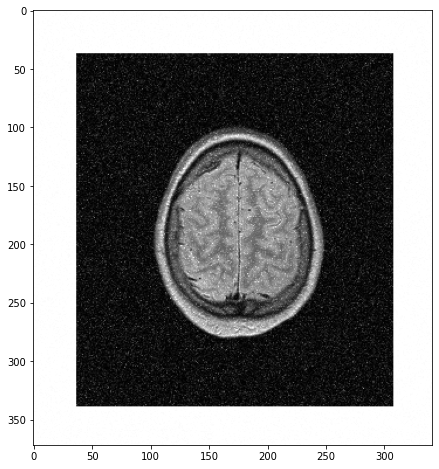

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

noisy = cv2.imread("MRI_Noisy.png", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(8, 8))
plt.imshow(noisy, cmap='gray')
plt.show()


# Part 2:

Plot histogram of white part


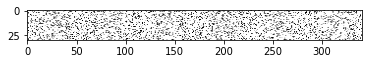

In [2]:
white = noisy[:30]

plt.imshow(white, cmap='gray')
plt.show()


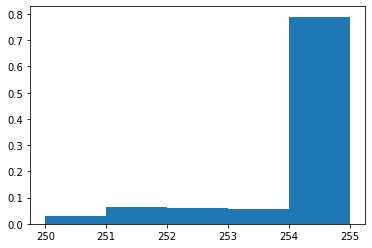

In [3]:
plt.hist(white.ravel(), bins=[i for i in range(250, 256)], density=True)
plt.show()


# Part 3:

Plot histogram of black part and recognize noise type


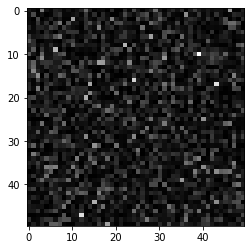

In [4]:
black = noisy[50:100, 50:100]

plt.imshow(black, cmap='gray')
plt.show()


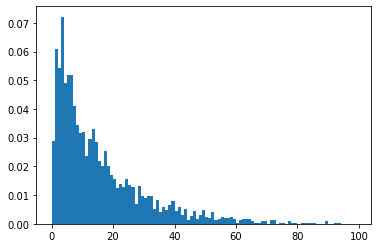

In [5]:
plt.hist(black.ravel(), bins=[i for i in range(0, 100)], density=True)
plt.show()


### So noises on the image should be erlang(gamma) or exponential


# Part 4:

Show dental image


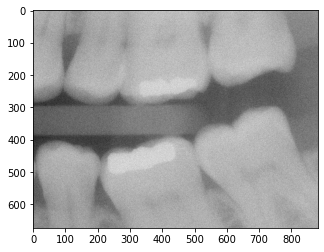

In [6]:
dental = cv2.imread("DentalXray_Noisy.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(dental, cmap='gray')
plt.show()


# Part 5:

Adaptive local noise reduction

### First we need to caclculate Noise variance

In [7]:
hist_list = [0] * 256

for i in range(dental.shape[0]):
    for j in range(dental.shape[1]):
        hist_list[dental[i][j]] += 1

total = sum(hist_list)
hist_list = [i/total for i in hist_list]


In [8]:
m = 0
for i in range(0, 256):
    m += i*hist_list[i]

noise_variance = 0
for i in range(0, 256):
    noise_variance += ((i-m)**2)*hist_list[i]


### Now we apply the adaptive local noise reduction (7x7) filter:


In [9]:
dental = dental.astype(np.float64)
denoised_dental_with_adaptive_local = dental.copy()

for i in range(dental.shape[0]):
    for j in range(dental.shape[1]):
        local_variance = 0
        mean_local = 0
        for m in range(-3, 4):
            for n in range(-3, 4):
                try:
                    tmp = dental[i+m][j+n]
                    mean_local += tmp
                except:
                    mean_local += 0
        mean_local /= 49
        for m in range(-3, 4):
            for n in range(-3, 4):
                try:
                    tmp = dental[i+m][j+n]-mean_local
                    local_variance += tmp**2
                except:
                    local_variance += (0-mean_local)**2
        local_variance /= 49
        denoised_dental_with_adaptive_local[i][j] = dental[i][j]-(
            dental[i][j]-mean_local)*(noise_variance/local_variance)


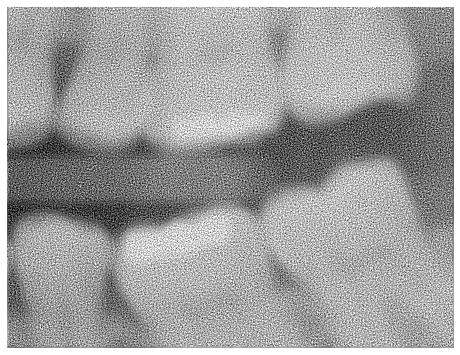

In [10]:
plt.figure(figsize=(8, 8))
plt.imshow(denoised_dental_with_adaptive_local, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()


# Part 6:

Averaging filter

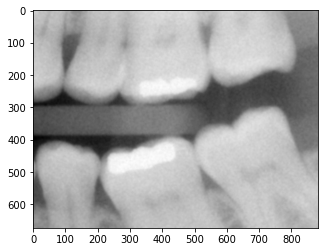

In [11]:
averaging_filtered_dental = cv2.blur(dental, (7, 7))

plt.imshow(averaging_filtered_dental,cmap='gray')
plt.show()

# Part 7:

Compare denoisy filters

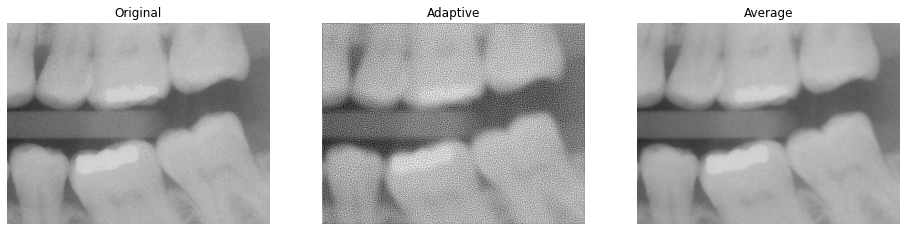

In [12]:

plt.figure(figsize=(16, 16))
plt.subplot(1, 3, 1)
plt.imshow(dental, cmap='gray')
plt.title('Original')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(denoised_dental_with_adaptive_local, cmap='gray', vmin=0, vmax=255)
plt.title('Adaptive')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(averaging_filtered_dental, cmap='gray', vmin=0, vmax=255)
plt.title('Average')
plt.axis('off')

plt.show()


### It is clear that adaptive filter worked far better than averaging filter